In [1]:
import tensorflow as tf
from keras import Input
from keras.layers import UpSampling2D, add
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, LeakyReLU
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warning message of tensorflow
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
#from sklearn.metrics import classification_report,confusion_matrix
import csv
import cv2

Using TensorFlow backend.


In [2]:
# Load X data
path1 = './train_vgg/'
X_data = os.listdir(path1)
X_data = sorted(X_data)

X = np.array([np.array(cv2.imread(path1 + img)).flatten() for img in X_data],'f') 
X = np.array(X)
print(np.shape(X))

(32611, 12288)


In [3]:
data = np.genfromtxt('annot_train.csv', delimiter = ',')
l1,l2 = np.shape(data)
Y = data[1:l1,3:13]
Y = np.array(Y)
# print(np.shape(Y))
# print(Y)
# mlb = MultiLabelBinarizer()
# label = mlb.fit_transform(Y)
# for (i, label) in enumerate(mlb.classes_):
#     print("{}. {}".format(i + 1, label))
# print(label)

In [4]:
#batch_size to train
batch_size = 256

# number of output classes
nb_classes = 2

# number of epochs to train
nb_epoch = 50

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = 4)
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

# Assigning X_train and X_test as float
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

# Normalization of data 
# Data pixels are between 0 and 1
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices
print(np.shape(Y_train))
# mlb = MultiLabelBinarizer(classes=None, sparse_output)
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)


(29349, 10)


In [6]:
Y_train = Y_train[0:len(Y_train),:10,1]
Y_test = Y_test[0:len(Y_test),0:10,1]
# print(Y_train[2:5])


In [9]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))

In [10]:
opt = SGD(lr = 0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

results = model.fit(X_train, Y_train, batch_size=512, epochs=5, callbacks=callbacks, validation_split = 0.2)
model.summary()

Train on 23479 samples, validate on 5870 samples
Epoch 1/5
23479/23479 [==============================] - 40s 2ms/step - loss: 0.2444 - acc: 0.9367 - val_loss: 0.2489 - val_acc: 0.9347
Epoch 2/5
23479/23479 [==============================] - 30s 1ms/step - loss: 0.2444 - acc: 0.9367 - val_loss: 0.2489 - val_acc: 0.9347
Epoch 3/5
23479/23479 [==============================] - 31s 1ms/step - loss: 0.2444 - acc: 0.9367 - val_loss: 0.2489 - val_acc: 0.9347
Epoch 4/5
23479/23479 [==============================] - 31s 1ms/step - loss: 0.2444 - acc: 0.9367 - val_loss: 0.2489 - val_acc: 0.9347
Epoch 5/5
23479/23479 [==============================] - 32s 1ms/step - loss: 0.2444 - acc: 0.9367 - val_loss: 0.2489 - val_acc: 0.9347
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d_

In [11]:
# visualizing losses and accuracy
train_loss = results.history['loss']
val_loss = results.history['val_loss'] 
train_acc = results.history['acc']
val_acc = results.history['val_acc']

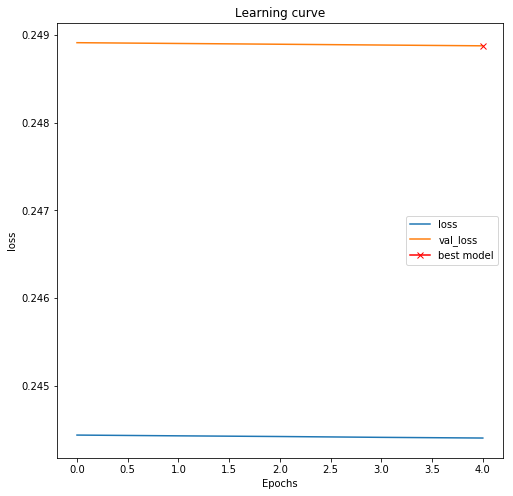

In [12]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot(np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend();

In [13]:
y_pred = model.predict(X_test) # Predicts classes of all images in test data 
print(y_pred[1])
p = model.predict_proba(X_test) # To predict probability
print(p[0])

[0.10018086 0.09978946 0.10000551 0.0999742  0.09989042 0.10009074
 0.10002649 0.10014378 0.09997661 0.09992193]
[0.10016369 0.09979052 0.10001808 0.09996641 0.0998956  0.10010199
 0.10001761 0.10014131 0.09996893 0.0999359 ]


In [14]:
print(y_pred[1],'\n',Y_test[1])

[0.10018086 0.09978946 0.10000551 0.0999742  0.09989042 0.10009074
 0.10002649 0.10014378 0.09997661 0.09992193] 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
